In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt  # plotting
import numpy as np  # computating
import pandas as pd
import xarray as xr  # data handling

from  eofs.xarray  import  Eof

import sys
import os

import utils

**Quasi Biennial Oscillation Data**

In [2]:
qbo = utils.get_qbo()

qbo_ds = qbo.groupby('time.dayofyear') - qbo.groupby('time.dayofyear').mean(dim = 'time')

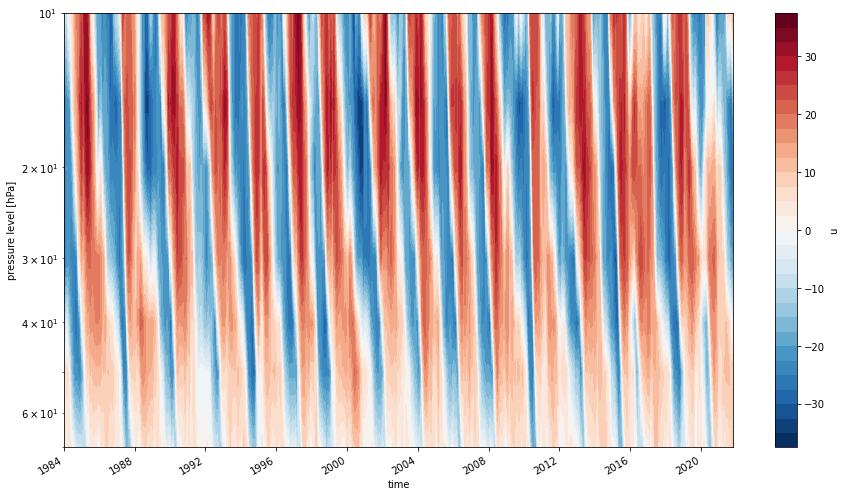

In [3]:
plt.figure(figsize = (15,8))
qbo_ds.plot.contourf(levels = 30, yincrease = False, yscale = 'log')
plt.show()

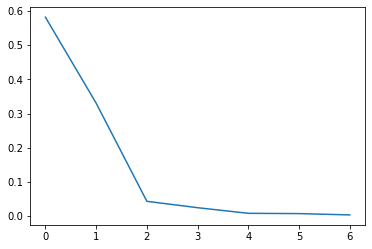

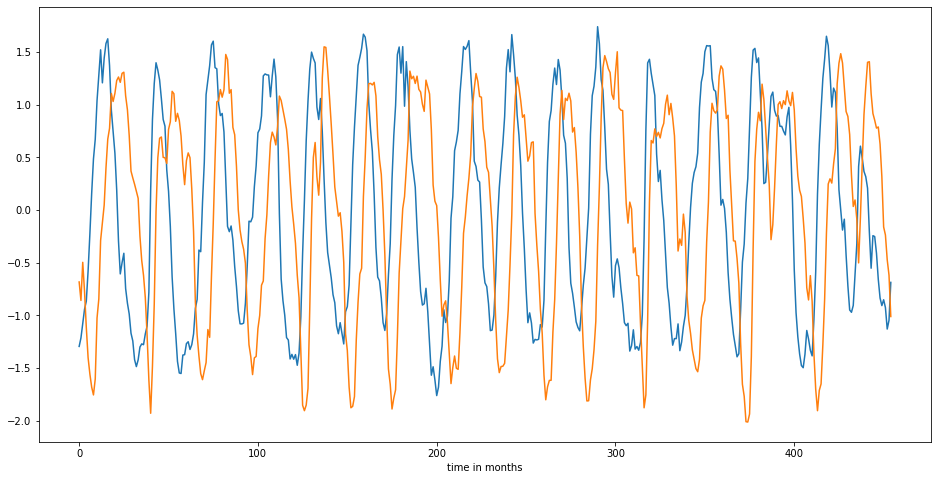

In [19]:
#EOF Analysis (using eofs package)

solver = Eof(qbo_ds.T)
eofs = solver.eofs(neofs = 2)
expl_var = solver.varianceFraction()
pcs = solver.pcs(pcscaling = 1, npcs = 2) 
    
plt.plot(expl_var)
plt.show()
fig2 = plt.figure(figsize = (16,8))
plt.plot(pcs)
plt.xlabel('time in months')
plt.show()

Text(0, 0.5, 'PC Mode 2')

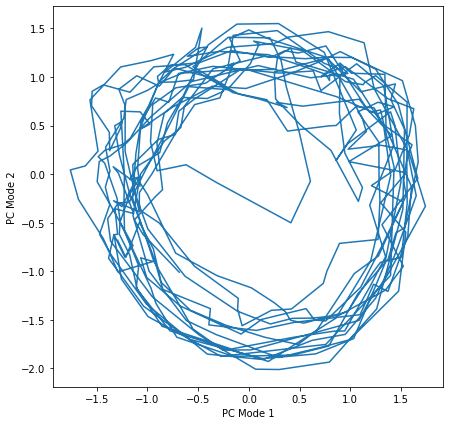

In [26]:
#plot PC1 and PC2 phase diagram

plt.figure(figsize = (7,7))
plt.plot(pcs.sel(mode=0), pcs.sel(mode=1))
plt.xlabel('PC Mode 1')
plt.ylabel('PC Mode 2')

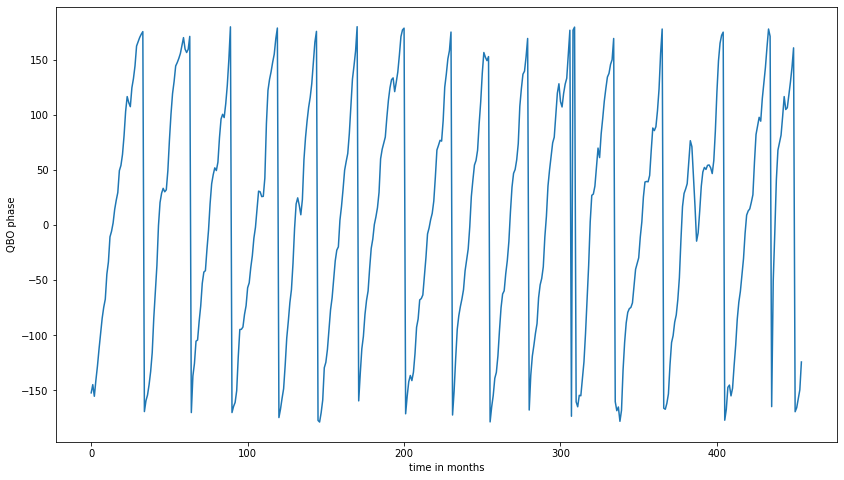

In [36]:
#compute time series of the phase diagram

qbo_phase = np.rad2deg((np.arctan2(pcs.sel(mode =1), pcs.sel(mode =0))))

plt.figure(figsize = (14,8))
plt.plot(qbo_phase)
plt.xlabel('time in months')
plt.ylabel('QBO phase')
plt.show()

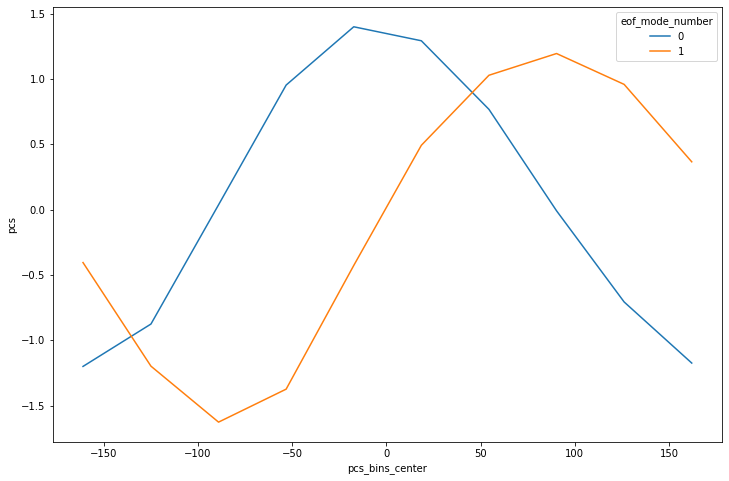

In [40]:
plt.figure(figsize = (12,8))
pcs.groupby_bins(qbo_phase, bins=10).mean().plot(hue="mode")
plt.show()

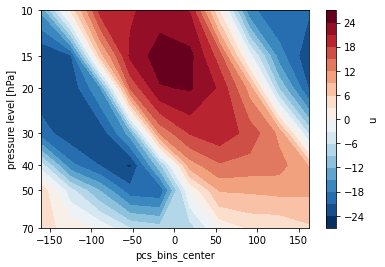

In [58]:
fig, ax = plt.subplots()
qbo_ds.groupby_bins(qbo_phase, bins=10).mean().plot.contourf(
    yincrease=False, levels=20, yscale="log", ax=ax
)
ax.set_yticks(qbo.p.values)
ax.minorticks_off()
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
plt.show()